In [1]:
import random
import math
import numpy as np 
import matplotlib.pyplot as plt 

# Stochastic modeling and simulation

In science, we are often more interested in the distribution of a set of outcomes rather than a single event. This may be the probability distribution of a molecule diffusing a specific distance as a function of time, the distribution of mRNA molecules per cell produced from a constitutively expressing promoter, or the probability distribution of a model parameter given a collection of data. Stochastic simulations allow us to generate a series of simulations of a system in which one step (such as the direction a molecule will diffuse) is governed by random chance. These simulations often boil down to flipping a coin to dictate if said step will occur or not.

Of course, sitting in your office chair flipping a US quarter over and over again is not how one should do a simulation. To get a sense of the probability distribution of some outcome, we often have to simulate the process thousands of times. This means that we need to know how to make our computers do the heavy lifting.

The use of stochastic models in simulation requires that we understand basic concepts about __random numbers__ and __probability theory__.

---

### Probability distributions

A probability distribution is a function that describes the likelihood of a random variable taking on certain values. In other words, it tells you how likely it is that a particular event will occur.

There are many different types of probability distributions, but some of the most commonly used ones include the normal distribution, the binomial distribution, and the Poisson distribution.

Here's an example of how you can use Python to generate a random sample from a normal distribution:

```python
import numpy as np

# Define the parameters of the distribution
mu = 0  # mean
sigma = 1  # standard deviation

# Generate a random sample of size 100 from the normal distribution
sample = np.random.normal(mu, sigma, size=100)

# Compute the mean and standard deviation of the sample
sample_mean = np.mean(sample)
sample_std = np.std(sample)

print("Sample mean:", sample_mean)
print("Sample standard deviation:", sample_std)
```

In this example, we first define the parameters of the normal distribution, which are the mean (`mu`) and the standard deviation (`sigma`). We then use the `np.random.normal()` function from the NumPy library to generate a random sample of size 100 from the normal distribution.

Finally, we compute the mean and standard deviation of the sample using the `np.mean()` and `np.std()` functions, respectively.

This is just a simple example, but it demonstrates the basic concepts of probability distributions and how they can be used in Python.

### Important probability distributions

In [2]:
from scipy.stats import uniform

# generate random numbers from N(0,1)
data_uniform = uniform.rvs(size=10000, loc=0, scale=1)

In [3]:
# or using Numpy
data_uniform = np.random.uniform(size=10000, low=0, high=1)

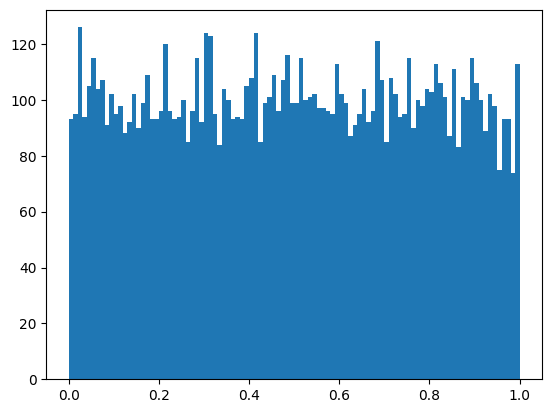

In [4]:
plt.hist(data_uniform, bins=100);

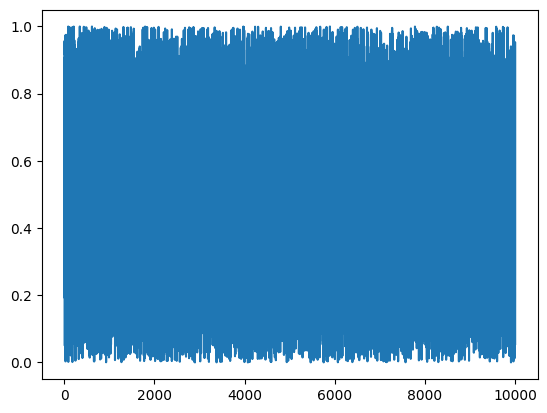

In [5]:
plt.plot(data_uniform)

In [6]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000, loc=0, scale=1)  # loc=mean, scale=std-dev

In [7]:
# or using Numpy
data_normal = np.random.normal(size=10000) # loc=0, scale=1

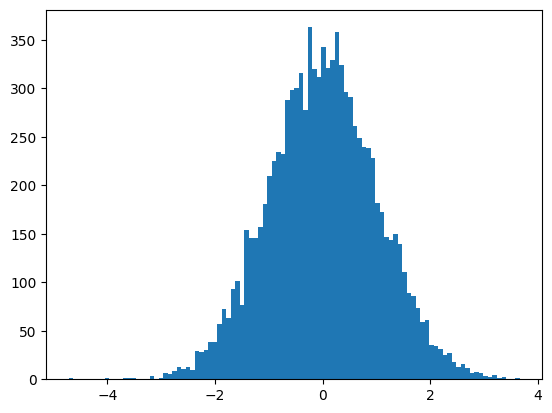

In [8]:
plt.hist(data_normal, bins=100);

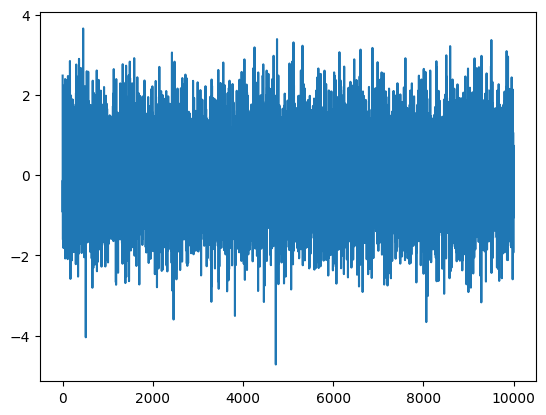

In [9]:
plt.plot(data_normal);

---

### A simple random walk in 1D

Decide whether to move left or right by flipping a coin and seeing if it comes up 'heads' or 'tails'.

You can also think of a molecule that moves either left or right with equal step probabilities at each subsequent time point.


In [10]:
# Define our step probability and number of steps.
step_prob = 0.5  # Can step left or right equally.
n_steps = 1_000_000   # Essentially time.

# Set up a vector to store our positions. 
position = np.zeros(n_steps)  # Full of zeros.

# Loop through each time step.
for i in range(1, n_steps):
    # Flip a coin.
    flip = np.random.random()  # how are these random numbers distributed?

    # Figure out which way we should step.
    if flip < step_prob:
        step = -1  # To the 'left'.
    else:
        step = 1  # to the 'right'.

    # Update our position based off of where we were in the last time point. 
    position[i] = position[i-1] + step

print('Final position:',position[-1])

Final position: -245.0


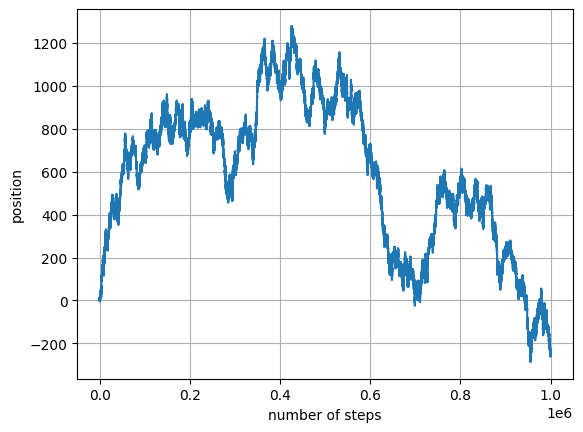

In [11]:
# Make a vector of time points.
steps = np.arange(0, n_steps, 1) # arange from 0 to n_steps taking intervals of 1.


# Plot it!
plt.plot(steps, position)
plt.xlabel('number of steps')
plt.ylabel('position')
plt.grid()

It turns out that such a random walk is a good model for diffusion, that is to describe how a molecule moves within a gas.

Notice that at the beginning of our for loop, we specified our range to be from 1 to n_steps. This is because the first entry (index 0) of our position vector is our starting position. Since we update our position at timepoint *i* based off of where we were at time step *i* - 1, we have to start at index 1.



In [12]:
# Useful to create function:

def random_walk_1d(n_steps, step_prob, walk):  # rename position to walk
    # Loop through each time step.
    for i in range(1, n_steps):
        # Flip a coin.
        flip = np.random.random()

        # Figure out which way we should step.
        if flip < step_prob:
            step = -1  # To the 'left'.
        else:
            step = 1  # to the 'right'.

        # Update our position based off of where we were in the last time point. 
        walk[i] = walk[i-1] + step

    return walk

1147.0


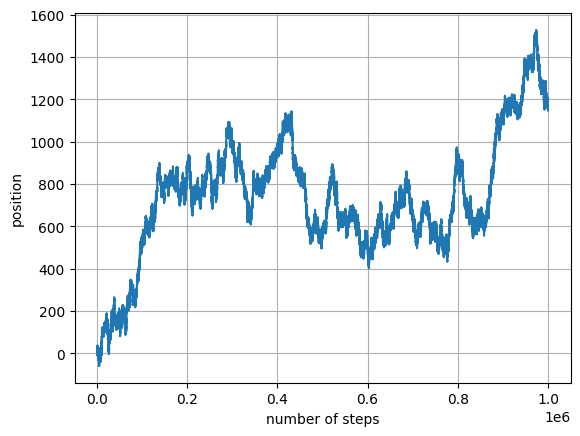

In [13]:
# Use the function

# Make a vector of time points.
step_prob = 0.5  # Can step left or right equally.
n_steps = 1_000_000   # Essentially time.
walk = np.zeros(n_steps) 

# call it
walk = random_walk_1d(n_steps, step_prob, walk)

print(walk[-1])

steps = np.arange(0, n_steps, 1) # convenient "time" array

# Plot it!
plt.plot(steps, walk)
plt.xlabel('number of steps')
plt.ylabel('position')
plt.grid()

### Create a distribution of "walks"


In [14]:
n = 1000
num_walks = 10
walks = np.zeros((num_walks, n))

for i in range(num_walks):
    walks[i,:] = random_walk_1d(n, 0.5, walks[i,:])  # Note I pass 1-walk

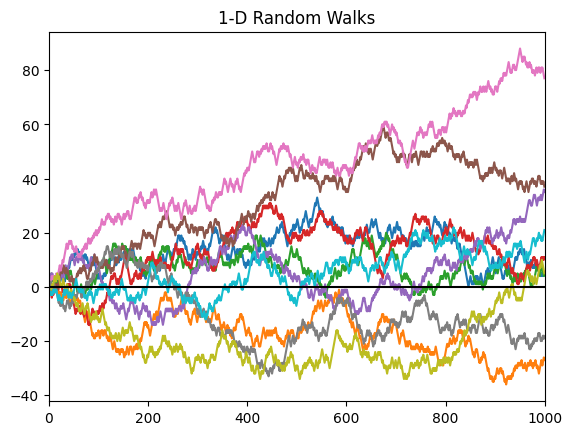

In [15]:
for i in range(num_walks):
    _ = plt.plot(walks[i,:])
    
plt.title("1-D Random Walks")
plt.xlim([0, n])
_ = plt.axhline([0], color="k")

This is a __random__ sample of random walks!

#### Properties of the 1D random walk

* zero mean
* dispersion which increases with number of steps, as $\sqrt{N_{steps}}$

Let's look at mean square distance

\begin{equation}
msd = \frac{1}{N}\sum_i^N d_i^2
\end{equation}


In [16]:
# From above - but make a function
def simulation(p, N):
    """ Main simulation driver that calls random_walk_1d """
    walk = np.zeros(N) 
    walk = random_walk_1d(N, p, walk)
    print(walk[-1])
    return walk

#### 1-walk

2451.0
Error in callback <function _draw_all_if_interactive at 0x0000021AFF431800> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

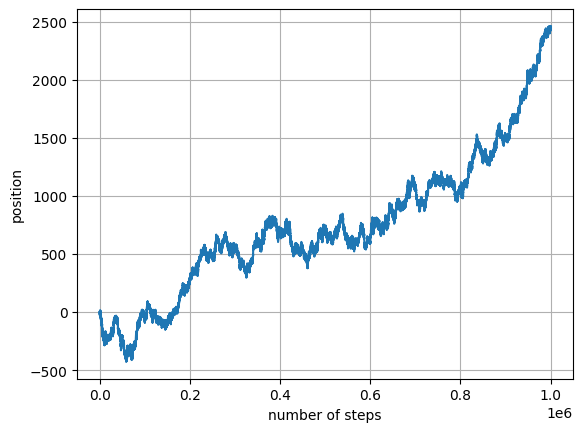

In [17]:
# Use functions
prob = 0.5  # Can step left or right equally.
num_steps = 1_000_000   # Essentially time.

walk = simulation(prob, num_steps)
steps = np.arange(0, num_steps, 1) # arange from 0 to n_steps taking intervals of 1.

# Visualize 
plt.plot(steps, walk)
plt.xlabel('number of steps')
plt.ylabel('position')
plt.grid()


#### N-walks

In [ ]:
# Modify function a little bit to perform N-walks
def simulation(p, N, N_sim):
    """ Main simulation driver that calls random_walk_1d N_sim times"""
    # Make position vectors. This will include all simulations.
    array = np.zeros((N_sim, N))
    # Loop through each simulation.
    for i in range(N_sim):
        # Loop through each step. 
        array[i,:] = random_walk_1d(N, p, array[i,:])
    return array



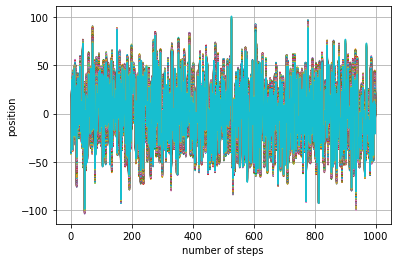

In [ ]:
# Perform the random walk simulation 1000 times. 
n_simulations = 1000  # N-walks
prob = 0.5  # Can step left or right equally.
num_steps = 1000   # Essentially time.

# call simulation
walks = simulation(prob, num_steps, n_simulations)
steps = np.arange(0, num_steps, 1) # arange from 0 to n_steps taking intervals of 1.

# Visualize
plt.plot(steps, walks)
plt.xlabel('number of steps')
plt.ylabel('position')
plt.grid()


You'll notice that this cell takes a bit longer to run than the previous one. This is because we are doing the simulation a thousand times over! 

To show the random walks, we'll plot all of the trajectories over each other as thin lines.

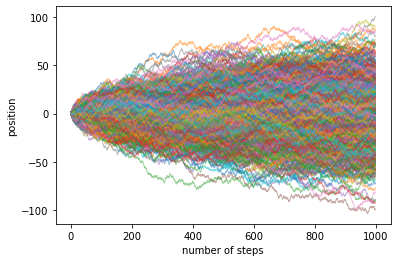

In [ ]:
# Plot all of the trajectories together.
for i in range(n_simulations):
    # Remembering that `position` is just a two-dimensional matrix that is 
    # n_simulations by n_steps, we can get each step for a given simulation 
    # by indexing as position[i, :].
    plt.plot(steps, walks[i, :], linewidth=1, alpha=0.5) 
    
# Add axis labels.
plt.xlabel('number of steps')
plt.ylabel('position');

We can look at the distribution of positions at various steps in time by making histograms of the positions of each simulation. Let's take a look at the distribution of positions at t=200 steps.

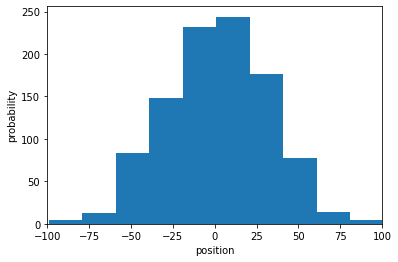

In [ ]:
# Make a histogram of the positions. To look at t=200, we have to index at 
# 199 because indexing starts at 0  in Python.

plt.hist(walks[:, 999])
plt.xlabel('position')
plt.ylabel('probability')

# Set the xlimits to cover the entire range. 
plt.xlim([-100, 100]);

We see that this qualitatively appears to be Gaussian. If we had to guess, we could say that the mean looks like it is right at about zero. Let's take a look at the distribution of positions at the last time point as well.

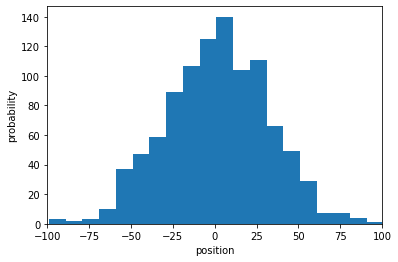

In [ ]:
# Make a histogram of the position distribution at the last time step. We could
# just index at 999, but indexing at -1 will always return the distribution at
# the last time step, whatever that may be. 
plt.hist(walks[:, -1], bins=20)
plt.xlabel('position')
plt.ylabel('probability')
plt.xlim([-100, 100]);

Again, this distribution looks somewhat Gaussian with a mean of approximately zero. We can actually compute the mean position from our simulation by iterating through each time step and simply computing the mean. Let's plot the mean at each time point as a red line.

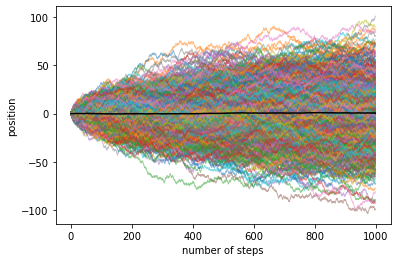

In [ ]:
# Compute the mean position at each step and plot it. 
mean_position = np.zeros(num_steps)
for i in range(num_steps):
    mean_position[i] = np.mean(walks[:, i])

# Plot all of the simulations.
for i in range(n_simulations):
    plt.plot(steps, walks[i, :], linewidth=1, alpha=0.5)
    
# Plot the mean as a thick black line. 
plt.plot(steps, mean_position, 'k-')

# Add the labels.
plt.xlabel('number of steps')
plt.ylabel('position');


#### So, the mean position is zero



Let's calculate the mean squared displacement (MSD) and plot it as a function of the number of steps.

MSD: measure of the deviation of the position of a particle with respect to a reference position over time

$$ MSD = \frac{1}{N} \sum_{i=1}^{N} (x_i(t) - x_i(0))^2$$

---

In [ ]:
# Compute mean square distance of final position
diff = walks[:,-1]
sq_diff = diff*2
msd = np.mean(sq_diff)

print("MSD: ",msd)
print("Dispersion: ",np.sqrt(num_steps))

MSD:  1.148
Dispersion:  31.622776601683793


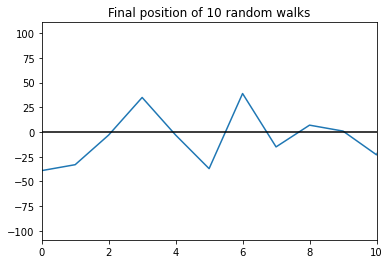

In [ ]:
_ = plt.plot(diff)
plt.title("Final position of "+str(num_walks)+" random walks")
plt.xlim([0, num_walks])
_ = plt.axhline([0], color="k")

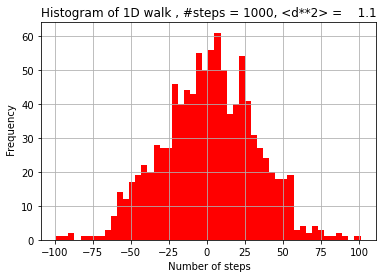

In [ ]:
plt.title('Histogram of 1D walk , #steps = %i, <d**2> = %6.1f' % (num_steps, msd))
plt.hist(diff, bins=50, color='red') 
plt.xlabel(' Number of steps')
plt.ylabel(' Frequency')
plt.grid()

---
---
___
### Optional

### Optional Analysis

In a simple random walk simulation, the difference between using random numbers drawn from a uniform distribution versus random numbers drawn from a normal distribution can have a significant impact on the results.

A random walk is a stochastic process that describes the movement of a particle or agent that moves randomly in space. In a simple random walk, the agent moves randomly in discrete steps, either to the left or to the right, with equal probability. The position of the agent at each time step is determined by the sum of the previous positions and the current step. In other words, the position of the agent at time `t` is given by:

```
x(t) = x(t-1) + delta
```

where `delta` is a random number that determines the direction and magnitude of the step.

When simulating a random walk using Python, the choice of distribution used to generate the random numbers `delta` can have a significant impact on the results. If we use random numbers drawn from a uniform distribution, the steps taken by the agent will be equally likely to be in either direction, regardless of the magnitude of the step. This can result in the agent making large jumps in either direction, which can lead to a very different outcome than if we were using random numbers drawn from a normal distribution.

On the other hand, if we use random numbers drawn from a normal distribution, the steps taken by the agent will tend to be smaller and more evenly distributed around the mean value. This can result in a smoother and more predictable random walk, as the agent is less likely to make large jumps in either direction.

Below is an example of a simple random walk simulation using both uniform and normal distributions in Python:

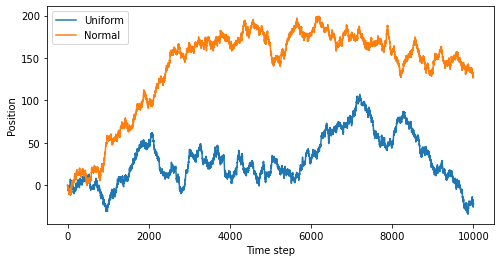

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
#np.random.seed(123)

# Define the number of steps and the step size
n_steps = 10000
step_size = 1

# Generate random numbers from a uniform distribution
uniform_deltas = np.random.choice([-1, 1], size=n_steps)

# Generate random numbers from a normal distribution
normal_deltas = np.random.normal(size=n_steps)

# Calculate the positions of the agent for both simulations
uniform_positions = np.cumsum(step_size * uniform_deltas)
normal_positions = np.cumsum(step_size * normal_deltas)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(uniform_positions, label='Uniform')
ax.plot(normal_positions, label='Normal')
ax.legend()
ax.set_xlabel('Time step')
ax.set_ylabel('Position')
plt.show()


In this example, we first define the number of steps (`n_steps`) and the step size (`step_size`). We then generate random numbers from a uniform distribution using the `np.random.choice()` function and from a normal distribution using the `np.random.normal()` function. We use the `np.cumsum()` function to calculate the positions of the agent for both simulations, and then plot the results using the `matplotlib.pyplot` library.

When we run this simulation, we can see that the random walk using the uniform distribution appears much more jagged and erratic than the random walk using the normal distribution. This is because the uniform distribution is more likely to produce large jumps in either direction, while the normal distribution produces smaller and more evenly distributed steps. 

Overall, the choice of distribution can have a significant impact on the behavior of a random walk simulation. In general, the normal distribution tends to produce more predictable and smoother random walks, while the uniform distribution can lead to more erratic and unpredictable behavior. However, the specific results will depend on the particular parameters and implementation of the simulation.

Performing multiple random walk simulations using both uniform and normal distributions can help us better understand the behavior of the simulations and the statistical properties of the results.

When we perform multiple random walk simulations using the same parameters and distribution, we can calculate the mean and standard deviation of the resulting distributions. The mean tells us the average value of the distribution, while the standard deviation tells us the spread or variability of the distribution.

If we perform multiple random walk simulations using a uniform distribution, the resulting distributions will typically have a large spread or variability, as the uniform distribution is more likely to produce large jumps in either direction. This can result in a wide range of possible outcomes for each simulation, leading to a large standard deviation.

On the other hand, if we perform multiple random walk simulations using a normal distribution, the resulting distributions will typically have a smaller spread or variability, as the normal distribution produces smaller and more evenly distributed steps. This can result in a narrower range of possible outcomes for each simulation, leading to a smaller standard deviation.

Here's an example of how we can perform multiple random walk simulations using both uniform and normal distributions in Python, and calculate the mean and standard deviation of the resulting distributions:

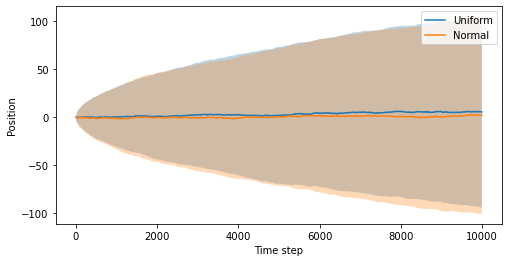

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
np.random.seed(123)

# Define the number of simulations, steps, and step size
n_simulations = 1000
n_steps = 10000
step_size = 1

# Generate random numbers from a uniform distribution
uniform_deltas = np.random.choice([-1, 1], size=(n_simulations, n_steps))

# Generate random numbers from a normal distribution
normal_deltas = np.random.normal(size=(n_simulations, n_steps))

# Calculate the positions of the agent for both simulations
uniform_positions = np.cumsum(step_size * uniform_deltas, axis=1)
normal_positions = np.cumsum(step_size * normal_deltas, axis=1)

# Calculate the mean and standard deviation of the positions for each time step
uniform_mean = np.mean(uniform_positions, axis=0)
uniform_std = np.std(uniform_positions, axis=0)
normal_mean = np.mean(normal_positions, axis=0)
normal_std = np.std(normal_positions, axis=0)

# Plot the results
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(uniform_mean, label='Uniform')
ax.plot(normal_mean, label='Normal')
ax.fill_between(range(n_steps), uniform_mean - uniform_std, uniform_mean + uniform_std, alpha=0.3)
ax.fill_between(range(n_steps), normal_mean - normal_std, normal_mean + normal_std, alpha=0.3)
ax.legend()
ax.set_xlabel('Time step')
ax.set_ylabel('Position')
plt.show()


In this example, we first define the number of simulations (n_simulations), steps (n_steps), and step size (step_size). We then generate random numbers from a uniform distribution and from a normal distribution for all simulations using the np.random.choice() and np.random.normal() functions, respectively. We use the np.cumsum() function to calculate the positions of the agents for all simulations, and then use the np.mean() and np.std() functions to calculate the mean and standard deviation of the positions for each time step and across all simulations.

We can then plot the results, showing the mean position for each time step for both simulations, along with shaded regions representing one standard deviation above and below the mean.

When we run this simulation, we can see that the mean position for each time step is very similar between the uniform and normal distributions. However, the standard deviation is much larger for the uniform distribution, indicating that the position of the agent is more variable and less predictable when using a uniform distribution. This confirms the observation from the previous example, where the random walk using the uniform distribution appeared much more jagged and erratic than the random walk using the normal distribution.

Overall, by performing multiple simulations and calculating statistics like the mean and standard deviation, we can gain a better understanding of how different distributions affect the behavior of a random walk simulation.

---
---
---

## Markov chain

Discrete-time Markov chains are stochastic processes that undergo transitions from one state to another in a state space. Transitions occur at every time step. Markov chains are characterized by their lack of memory in that the probability to undergo a transition from the current state to the next depends only on the current state, not the previous ones. These models are widely used in scientific and engineering applications.

Here's an example of how you can write a Markov chain simulation using Python for a system that can transition among three states: rain, snow, and sunshine.

Let's assume that the transition probabilities between states are:

| From/To | Rain | Snow | Sunshine |
| ------- | ---- | ---- | -------- |
| Rain    | 0.6  | 0.3  | 0.1      |
| Snow    | 0.4  | 0.2  | 0.4      |
| Sunshine| 0.2  | 0.2  | 0.6      |

To simulate this system, we can use a 1-dimensional NumPy array to represent the current state of the system, and a 3x3 NumPy array to represent the transition probability matrix.

Here's the Python code to simulate the system for 100 steps:

```python
import numpy as np

# Define the transition probability matrix
transition_matrix = np.array([[0.6, 0.3, 0.1],
                              [0.4, 0.2, 0.4],
                              [0.2, 0.2, 0.6]])

# Define the initial state of the system
current_state = np.array([1, 0, 0])  # Starting with Rain

# Simulate the system for 100 steps
for i in range(100):
    print(current_state)
    current_state = np.dot(current_state, transition_matrix)
```

In this code, we first define the transition probability matrix as a 3x3 NumPy array. We then define the initial state of the system as a 1-dimensional NumPy array with a value of 1 for the "Rain" state and 0 for the other states. We then simulate the system for 100 steps by repeatedly multiplying the current state vector with the transition probability matrix using the `np.dot()` function.

This code will output the current state of the system at each step. The output will be a 1-dimensional NumPy array representing the probabilities of the system being in each state at each step.

Note that the Markov chain simulation assumes that the transition probabilities are constant over time, which may not be the case in real-world systems. Also, the simulation assumes that the system is in a steady state, which means that the probabilities of the system being in each state do not change over time. If the system is not in a steady state, the simulation results may not be accurate.

In [ ]:
import numpy as np

# Define the transition probability matrix
transition_matrix = np.array([[0.3, 0.3, 0.4],
                              [0.1, 0.45, 0.45],
                              [0.2, 0.3, 0.5]])

# Define the initial state of the system
current_state = np.array([1, 0, 0])  # Starting with snow

# Simulate the system for 100 steps
for i in range(100):
    print(current_state)
    current_state = np.dot(current_state, transition_matrix)

[1 0 0]
[0.3 0.3 0.4]
[0.2   0.345 0.455]
[0.1855  0.35175 0.46275]
[0.183375  0.3527625 0.4638625]
[0.18306125 0.35291438 0.46402438]
[0.18301469 0.35293716 0.46404816]
[0.18300775 0.35294057 0.46405167]
[0.18300672 0.35294109 0.4640522 ]
[0.18300656 0.35294116 0.46405227]
[0.18300654 0.35294117 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.46405229]
[0.18300654 0.35294118 0.

I can modify the code to include time-varying transition probabilities. One way to do this is to define the transition probability matrix as a function of time, which can change the probabilities over time. Here's an example:

In [ ]:
import numpy as np

# Define a function to generate the transition probability matrix at time t
def transition_matrix(t):
    if t < 10:
        return np.array([[0.6, 0.3, 0.1],
                         [0.4, 0.2, 0.4],
                         [0.2, 0.2, 0.6]])
    else:
        return np.array([[0.3, 0.5, 0.2],
                         [0.2, 0.3, 0.5],
                         [0.5, 0.2, 0.3]])

# Define the initial state of the system
current_state = np.array([1, 0, 0])  # Starting with Rain

# Simulate the system for 100 steps
for i in range(20):
    print(current_state)
    t = i  # time step
    current_transition_matrix = transition_matrix(t)
    current_state = np.dot(current_state, current_transition_matrix)

[1 0 0]
[0.6 0.3 0.1]
[0.5  0.26 0.24]
[0.452 0.25  0.298]
[0.4308 0.2452 0.324 ]
[0.42136 0.24308 0.33556]
[0.41716  0.242136 0.340704]
[0.4152912 0.241716  0.3429928]
[0.41445968 0.24152912 0.3440112 ]
[0.4140897  0.24144597 0.34446434]
[0.41392507 0.24140897 0.34466596]
[0.34479229 0.34831842 0.30688929]
[0.32654602 0.33826953 0.33518445]
[0.33320994 0.33179076 0.3349993 ]
[0.33382079 0.33314206 0.33303716]
[0.33329323 0.33346044 0.33324633]
[0.33330322 0.33333401 0.33336277]
[0.33333915 0.33332437 0.33333648]
[0.33333486 0.33333418 0.33333096]
[0.33333277 0.33333388 0.33333335]


In this code, we define a `transition_matrix()` function that takes a time parameter `t` and returns a 3x3 NumPy array representing the transition probability matrix at that time. In this example, the transition probabilities change at time step 50.

We then define the initial state of the system and simulate the system for 100 steps using a for loop. At each time step `t`, we call the `transition_matrix()` function to get the current transition probability matrix and multiply the current state vector with the matrix using `np.dot()` to get the next state vector.

This code will output the current state of the system at each step. The output will be a 1-dimensional NumPy array representing the probabilities of the system being in each state at each step. Note that the transition probabilities are now time-varying and can change over time.

#### Exponential growth simulated with a Markov chain

We will assume that the population can be in one of three states: "low" (state 0), "medium" (state 1), or "high" (state 2). The transition probabilities between these states will depend on the birth and death rates. Specifically, we will assume the following:

    The birth rate is the same for all states and is denoted by b.
    The death rate is the same for all states and is denoted by d.
    A low population (state 0) can either stay low (with probability 1 - b), transition to medium (with probability b), or die out (with probability d).
    A medium population (state 1) can transition to low (with probability b), stay medium (with probability 1 - b - d), or transition to high (with probability d).
    A high population (state 2) can either stay high (with probability 1 - d), transition to medium (with probability d), or die out (with probability b).

To simulate this Markov chain, we can use a numpy array to represent the transition matrix, where the element in row i and column j represents the probability of transitioning from state i to state j.

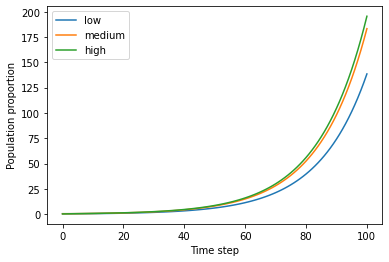

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the birth and death rates
b = 0.2
d = 0.1

# Define the transition matrix
P = np.array([[1-b, b, d],
              [b, 1-b-d, d],
              [0, b, 1-d]])

# Define the initial state of the population
x = np.array([0.4, 0.4, 0.2])  # Starting with 40% in state 0, 40% in state 1, and 20% in state 2

# Simulate the Markov chain for 100 time steps
n_steps = 100
population = np.zeros((n_steps+1, 3))
population[0] = x
for t in range(n_steps):
    x = np.dot(x, P)
    population[t+1] = x

# Plot the results
plt.plot(population[:, 0], label='low')
plt.plot(population[:, 1], label='medium')
plt.plot(population[:, 2], label='high')
plt.xlabel('Time step')
plt.ylabel('Population proportion')
plt.legend()
plt.show()


#### Steady state Markov chain

In [ ]:
# We consider a population that cannot comprise more than 100 individuals, and define the birth and death rates:

N = 100  # pop. size
a = .5/N # birth rate
b = .5/N # death rate

nsteps = 1000
x = np.zeros(nsteps)
x[0] = 25

Now we simulate our chain.

At each time step,there is a new birth with probability  $ax_t$, and independently, there is a new death with probability $bx_t$. These probabilities are proportional to the size of the population

In [ ]:
for t in range(nsteps - 1):
    if 0 < x[t] < N - 1:
        # Is there a birth?
        birth = np.random.rand() <= a*x[t]
        # Is there a death?
        death = np.random.rand() <= b*x[t] 
        # We update the population size. 
        x[t+1] = x[t] + 1*birth - 1*death
    # The evolution stops if we reach 0 or N.
    else:
        x[t + 1] = x[t]


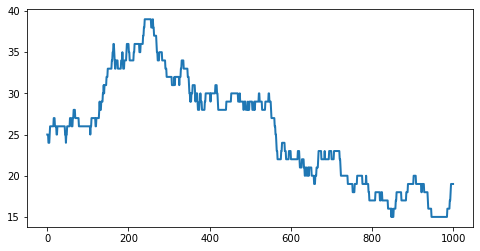

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(x, lw=2)

We see that, at every time step, the population size can stay stable, increase, or decrease by 1.

Now, we will simulate many independent trials of this Markov chain. We could run the previous simulation with a loop, but it would be very slow (two nested for loops). Instead, we vectorize the simulation by considering all independent trials at once. There is a single loop over time. At every time step, we update all trials simultaneously with vectorized operations on vectors. The x vector now contains the population size of all trials, at a particular time. At initialization time, the population sizes are set to random numbers between 0 and N:


In [ ]:
ntrials = 100
x = np.random.randint(size=ntrials,
                      low=0, high=N)


We define a function that performs the simulation. At every time step, we find the trials that undergo births and deaths by generating random vectors, and we update the population sizes with vector operations:

In [ ]:
def simulate(x, nsteps):
    """Run the simulation."""
    for _ in range(nsteps - 1):
        # Which trials to update?
        upd = (0 < x) & (x < N - 1)
        # In which trials do births occur?
        birth = 1 * (np.random.rand(ntrials) <= a * x)
        # In which trials do deaths occur?
        death = 1 * (np.random.rand(ntrials) <= b * x)
        # We update the population size for all trials
        x[upd] += birth[upd] - death[upd]


Now, let's look at the histograms of the population size at different times. These histograms represent the probability distribution of the Markov chain, estimated with independent trials (the Monte Carlo method):

In [ ]:
bins = np.linspace(0, N, 25)

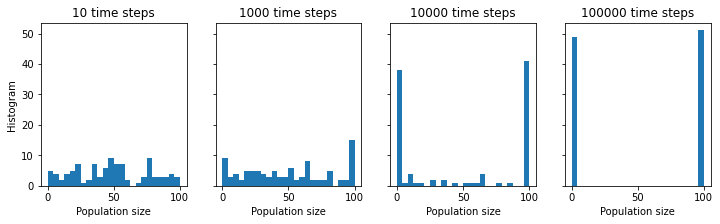

In [ ]:
nsteps_list = [10, 1000, 10000, 100000]
fig, axes = plt.subplots(1, len(nsteps_list),
                         figsize=(12, 3),
                         sharey=True)
for i, nsteps in enumerate(nsteps_list):
    ax = axes[i]
    simulate(x, nsteps)
    ax.hist(x, bins=bins)
    ax.set_xlabel("Population size")
    if i == 0:
        ax.set_ylabel("Histogram")
    ax.set_title(f"{nsteps} time steps")
